#Q2

In [12]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

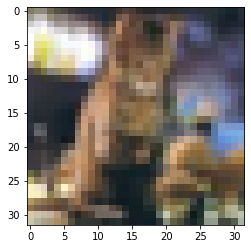

In [4]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [24]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
fc_model.add(keras.layers.Dense(units=128, activation='relu'))
fc_model.add(keras.layers.Dense(units=512, activation='relu'))
fc_model.add(keras.layers.Dense(units=256, activation='relu'))
fc_model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
fc_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 3072)              0         
                                                                 
 dense_36 (Dense)            (None, 128)               393344    
                                                                 
 dense_37 (Dense)            (None, 512)               66048     
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dense_39 (Dense)            (None, 10)                2570      
                                                                 
Total params: 593,290
Trainable params: 593,290
Non-trainable params: 0
_________________________________________________________________


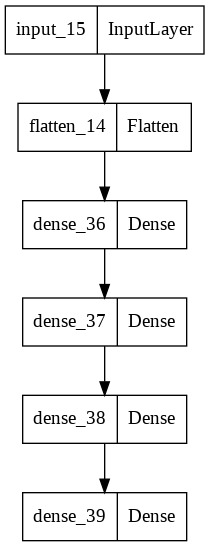

In [25]:
plot_model(fc_model)

In [13]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.add(keras.layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
Conv_model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
Conv_model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
Conv_model.add(keras.layers.Flatten())
Conv_model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
Conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        73792     
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                184330    
                                                                 
Total params: 286,314
Trainable params: 286,314
Non-trainable params: 0
_________________________________________________________________


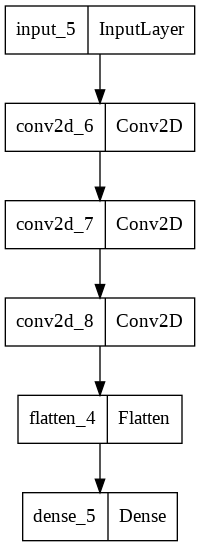

In [26]:
plot_model(Conv_model)

In [27]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9515 - accuracy: 0.2801
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8281 - accuracy: 0.3321
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7846 - accuracy: 0.3524
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7529 - accuracy: 0.3638
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7349 - accuracy: 0.3694


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 3ms/step - loss: 1.8096 - accuracy: 0.3394


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9662 - accuracy: 0.6613
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8767 - accuracy: 0.6932
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7914 - accuracy: 0.7236
Epoch 4/5
1563/1563 [

#Q3

In [2]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!rm -r sample_data

In [4]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:15<00:00, 36.9MB/s]


In [ ]:
!unzip fruits-360-original-size.zip

## A : complete resize image

In [6]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [7]:
def resize_img(img, desired_size = 224):
    # write your code here
    channels = 3
    old_size = img.shape
    ratio = float(desired_size) / max(old_size)
    new_size = (int(old_size[1] * ratio), int(old_size[0] * ratio))
    img = cv2.resize(img, new_size)
    diff_w = desired_size - new_size[0]
    diff_h = desired_size - new_size[1]
    top, bottom = diff_h//2, diff_h-(diff_h//2)
    left, right = diff_w//2, diff_w-(diff_w//2)
    new_img = np.zeros((desired_size, desired_size, channels), dtype=img.dtype)
    for i in range(channels):
      ch = img[:, :, i]
      new_ch = np.pad(ch, ((top, bottom),(left, right)), 'constant')
      new_img[:, :, i] = new_ch
    return new_img

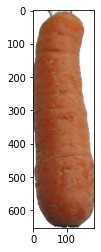

(653, 184, 3)


In [8]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()
print(img.shape)

(224, 224, 3)

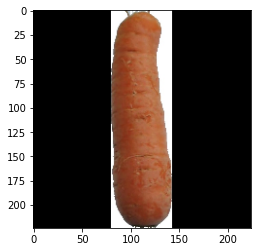

In [9]:
new_img = resize_img(img)
plt.imshow(new_img)
new_img.shape

## Image Data generator

In [10]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [16]:
# YOU CAN CHANGE IT
EPOCHS = 5

In [17]:
resnet = tf.keras.models.Sequential()
# Write your code here
resnet.add(keras.layers.Input(shape=(224, 224, 3)))
resnet_50 = tf.keras.applications.ResNet50(include_top=True, weights=None, classes=24)
resnet.add(resnet_50)
resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 24)                23636888  
                                                                 
Total params: 23,636,888
Trainable params: 23,583,768
Non-trainable params: 53,120
_________________________________________________________________


In [18]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [19]:
resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/5
65/65 [==============================] - 84s 1s/step - loss: 0.7884 - acc: 0.7864
Epoch 2/5
65/65 [==============================] - 65s 990ms/step - loss: 0.2194 - acc: 0.9270
Epoch 3/5
65/65 [==============================] - 63s 964ms/step - loss: 0.0466 - acc: 0.9856
Epoch 4/5
65/65 [==============================] - 63s 963ms/step - loss: 0.0484 - acc: 0.9849
Epoch 5/5
65/65 [==============================] - 63s 962ms/step - loss: 0.2132 - acc: 0.9350


## C : Fine-tune Resnet50 on fruits dataset.

In [20]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 
fine_tune_resnet.add(keras.layers.Input(shape=(224, 224, 3)))
resnet_50 = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
resnet_50.trainable = False
fine_tune_resnet.add(resnet_50)
fine_tune_resnet.add(keras.layers.Flatten())
fine_tune_resnet.add(keras.layers.Dense(units=24, activation='softmax'))
fine_tune_resnet.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 24)                2408472   
                                                                 
Total params: 25,996,184
Trainable params: 2,408,472
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [22]:
fine_tune_resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/5
65/65 [==============================] - 49s 695ms/step - loss: 5.8263 - acc: 0.4096
Epoch 2/5
65/65 [==============================] - 43s 662ms/step - loss: 0.3991 - acc: 0.8867
Epoch 3/5
65/65 [==============================] - 44s 669ms/step - loss: 0.2798 - acc: 0.9177
Epoch 4/5
65/65 [==============================] - 43s 661ms/step - loss: 0.1639 - acc: 0.9642
Epoch 5/5
65/65 [==============================] - 43s 658ms/step - loss: 0.1462 - acc: 0.9698


## Test models

In [23]:
resnet.evaluate(test_generator)

33/33 [==============================] - 24s 678ms/step - loss: 5.0227 - acc: 0.4048


[5.022700309753418, 0.4048231542110443]

In [24]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 25s 710ms/step - loss: 0.1047 - acc: 0.9820


[0.1046600416302681, 0.981993556022644]